# Final Projects Peter Fomas Hia -- Machine Learning Workshop Gdsc Binus University

**Import Library Neccessary**

In [26]:
#import library which neccessary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from sklearn.model_selection import train_test_split

#Read CSV

In [ ]:

path_data = "/content/drive/MyDrive/machine_learning_studyjam/Binus_workshop/computer_vision/final_project/Dataset_1.csv"
data = pd.read_csv(path_data)
data.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
0,-1.032690,2.096221,0.384194,-1.214555,2.432575,1.069743,-1.076878,2.140959,0.403971,-1.039528,...,2.423807,0.833363,-0.932956,2.047133,0.089361,-1.062281,2.080691,0.412019,-1.244573,3
1,-0.509585,-0.896533,-0.465612,0.033544,-0.781463,-0.934908,0.061976,-0.712155,-0.929289,-0.624238,...,-0.783508,-0.877666,0.084089,-0.718668,-0.965767,-0.567989,-0.911335,-0.415529,0.167377,3
2,-1.032690,-0.896533,1.243594,-1.101241,-0.781463,-0.934908,-0.355857,-0.020836,-0.726172,-1.039528,...,-0.783508,-0.851601,-0.481456,0.041508,-0.623651,-1.062281,-0.911335,1.288949,-1.201469,0
3,-1.024914,1.367049,0.014966,-1.141605,1.102526,0.197138,-0.921322,1.064377,0.235659,-0.973558,...,1.228601,0.089344,-0.932956,1.093751,0.017282,-0.920086,1.336901,0.012367,-0.990998,3
4,1.585219,-0.896533,-0.782318,0.692780,-0.781463,0.732274,-0.113010,-1.048795,1.248580,1.636419,...,-0.783508,0.902548,0.000080,-1.049062,1.518648,1.607938,-0.911335,-0.824106,0.663292,0
5,-1.032690,-0.730770,-0.053770,-0.811947,-0.781463,-0.934908,-0.231661,-0.134634,-0.929289,-1.039528,...,-0.783508,-0.877666,-0.214332,-0.111464,-0.965767,-1.062281,-0.783872,0.001072,-0.726590,2
6,-0.637440,0.123665,-0.524505,-0.228813,-0.548705,-0.934908,-0.953256,1.677278,0.096726,-0.544843,...,-0.478675,-0.877666,-0.932956,1.682134,0.260080,-0.549476,0.051097,-0.560389,-0.138996,1
7,1.425544,-0.896533,-1.285932,0.871052,-0.781463,0.231695,0.130219,-1.048795,0.173524,1.506657,...,-0.783508,0.293094,0.150984,-1.049062,0.528203,1.444752,-0.911335,-1.265504,0.903844,0
8,-0.002314,1.386348,0.511012,0.204443,0.894563,-0.167373,-0.107435,0.892959,-0.111459,0.092795,...,1.131393,-0.431711,-0.246314,0.890225,-0.324289,0.155420,1.358691,0.463341,0.401414,0
9,1.040889,-0.709846,-0.870259,0.845230,-0.781463,1.069906,0.199388,-1.048795,-0.680735,1.136828,...,-0.783508,1.349803,0.027833,-1.049062,-0.586744,1.050724,-0.703419,-1.041978,0.948074,1


# Explorasi Data Analyst ( EDA ) Part I & Data Preproccessing

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Columns: 257 entries, x1 to label
dtypes: float64(256), int64(1)
memory usage: 6.4 MB


In [63]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x248,x249,x250,x251,x252,x253,x254,x255,x256,label
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,...,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000
mean,-0.108383,0.109415,0.012731,-0.038641,0.025888,-0.055990,-0.071048,0.110057,-0.039071,-0.110402,...,0.042286,-0.069302,-0.075941,0.111274,-0.063311,-0.115492,0.081308,-0.005758,-0.023017,1.421569
std,0.918837,1.056640,0.940577,1.073387,1.036104,0.916824,0.998030,1.013487,0.812572,0.939323,...,1.024120,0.869944,1.014345,1.007270,0.831845,0.932384,1.056331,0.939202,1.032806,1.167798
min,-1.032690,-0.896533,-1.285932,-1.214555,-0.781463,-0.934908,-1.076878,-1.048795,-0.929289,-1.039528,...,-0.783508,-0.877666,-0.932956,-1.049062,-0.965767,-1.062281,-0.911335,-1.265504,-1.244573,0.000000
25%,-1.032690,-0.896533,-0.700087,-1.015734,-0.781463,-0.934908,-0.816931,-1.048795,-0.919927,-1.039528,...,-0.783508,-0.877666,-0.863381,-1.049062,-0.844952,-1.062281,-0.911335,-0.739660,-0.935890,0.000000
50%,-0.332834,-0.207360,-0.011766,-0.083122,-0.574530,-0.283327,-0.335854,0.092542,-0.099581,-0.357419,...,-0.515200,-0.319091,-0.365065,0.117323,-0.129394,-0.342554,-0.254558,-0.041212,-0.068236,1.000000
75%,0.618180,0.932127,0.593603,0.545812,0.749548,0.585535,0.413233,0.937152,0.405588,0.588843,...,0.809147,0.504317,0.304781,0.930016,0.333070,0.598419,0.895811,0.575592,0.595699,3.000000
max,2.725864,3.223942,3.532661,5.231793,3.814274,4.790517,4.698876,2.758523,3.063246,2.773907,...,3.514284,4.699131,5.075081,2.698013,3.258275,2.714228,3.226129,3.476898,4.926381,3.000000


#Melakukan analisis terhadap sebaran data dengan mengambil nilai minimum data sebagai batas bawah interval dan nilai maximum sebagai batas atas interval dalam range nilai data

In [64]:
data_indep = data.iloc[:, :256]
data_dep = data[['label']]

df_deskriptif_indep = data_indep.describe()
type_data_des = type(df_deskriptif_indep)

print("Tipe data dari output describe():", type_data_des)

Tipe data dari output describe(): <class 'pandas.core.frame.DataFrame'>


In [65]:
min_temp = df_deskriptif_indep.loc['min']
min_min = min_temp.min()
min_max = min_temp.max()
print(f"Minimum Value between all minimum data : {min_min}")
print(f"Maximum Value between all minimum data : {min_max}")


Minimum Value between all minimum data : -1.6386942
Maximum Value between all minimum data : -0.72967345


In [66]:
max_temp = df_deskriptif_indep.loc['max']
max_min = max_temp.min()
max_max = max_temp.max()
print(f"Minimum Value between all maximum data : {max_min}")
print(f"Maximum Value between all maximum data : {max_max}")

Minimum Value between all maximum data : 2.6557405
Maximum Value between all maximum data : 5.548133


In [67]:
missing = data.isnull().sum()
df_mis = pd.DataFrame(missing)
for i in df_mis.columns:
  unik_value = df_mis[i].unique()
  if unik_value !=0:
    print(unik_value)
  else:
    print("Missing Value not available, the data is correct..")

Missing Value not available, the data is correct..


In [68]:
data.shape

(3264, 257)

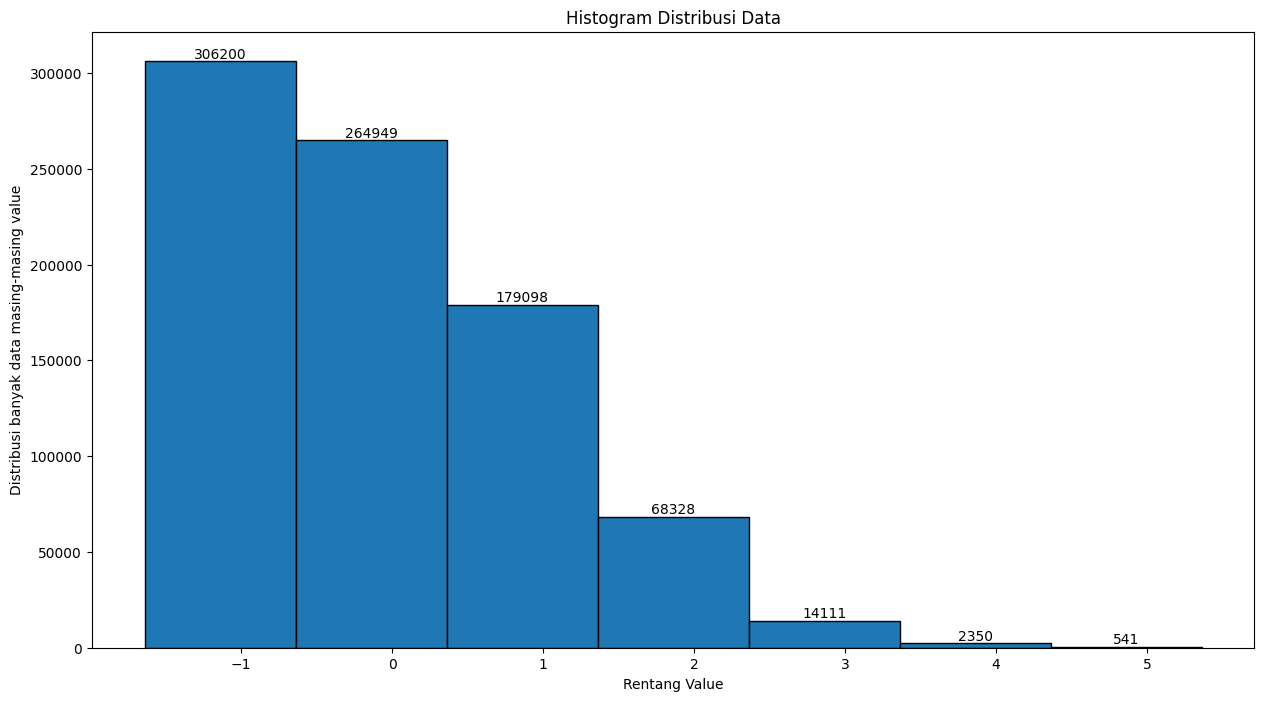

In [70]:
data_independen = data.iloc[:, :256]
plt.figure(figsize=(15,8))
bin = np.arange(min_min, max_max ) #start, end interval
counts, bins, _ = plt.hist(data_independen.values.flatten(), bins=bin, edgecolor='black') #values.flatten() untuk mengambil nilai dari seluruh dataframe ( menciptakan bar yang utuh dalam satu interval )

for i in range (len(bins)-1):
  plt.text((bins[i] + bins[i+1])/2, counts[i], int(counts[i]), ha='center', va='bottom') #menentukan penempatan posisi value diatas bar

plt.title("Histogram Distribusi Data")
plt.ylabel("Distribusi banyak data masing-masing value")
plt.xlabel("Rentang Value")
plt.show()

<Figure size 1000x700 with 0 Axes>

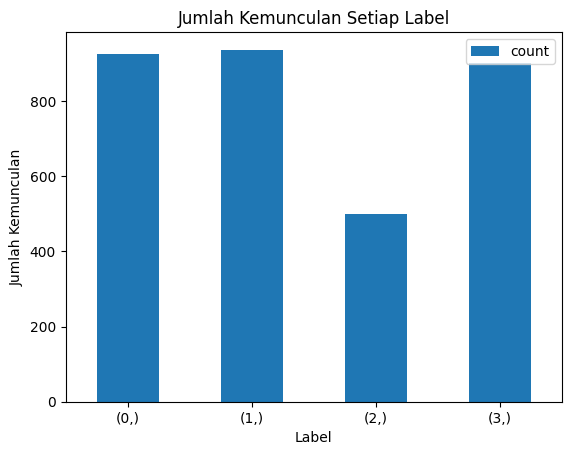

In [71]:
# [print(data_dep[i].unique()) for i in data_dep.columns if data_dep[i].unique() is not None]
for ul in data_dep.columns:
  unik = data_dep[ul].unique()

counts = data_dep.value_counts()
X_sort = counts.sort_index()
X = pd.DataFrame(X_sort)

plt.figure(figsize=(10,7))

X.plot(kind='bar')
plt.title('Jumlah Kemunculan Setiap Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=0)
plt.show()


In [72]:
label_ = 'label'
for col in data_indep:
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=data, x=col, y=label_, hue=label_, legend=False)
  plt.title(f'Scatter Plot Persebaran Data untuk Kolom {col}')
  plt.xlabel(f'Nilai {col}')
  plt.ylabel('Label')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

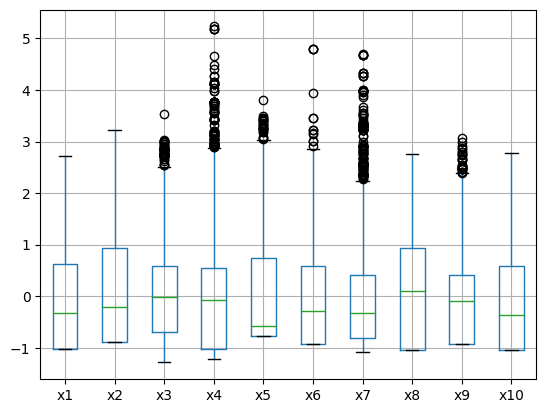

In [ ]:
summary = data_indep.describe()

Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

outlier_data = data_indep[(data_indep < lower_bound) | (data_indep > upper_bound)]
outlier_data.boxplot(column=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']) #melihat outlier dari 10 fitur pertama

In [73]:
for col in data.columns:
  unik = data[col].unique()
  print(f"Value unik di kolom {col} adalah : {unik} dengan panjang {len(unik)}\n")

Value unik di kolom x1 adalah : [-1.0326896  -0.50958455 -1.0249143  ... -0.80801654  1.5164055
 -0.29054946] dengan panjang 2040

Value unik di kolom x2 adalah : [ 2.0962212  -0.89653325  1.3670487  ...  2.3784938   1.0005959
  0.64979017] dengan panjang 1957

Value unik di kolom x3 adalah : [ 0.38419414 -0.46561196  1.2435944  ...  0.63698083  1.1027731
 -0.19962186] dengan panjang 2467

Value unik di kolom x4 adalah : [-1.2145549   0.03354438 -1.1012406  ... -0.9686028   0.38448885
  0.5405926 ] dengan panjang 2281

Value unik di kolom x5 adalah : [ 2.4325752  -0.7814635   1.1025258  ...  1.2795761  -0.10608828
 -0.6805312 ] dengan panjang 1675

Value unik di kolom x6 adalah : [ 1.0697434  -0.9349083   0.19713797 ... -0.4564895   0.9183431
 -0.66172385] dengan panjang 2055

Value unik di kolom x7 adalah : [-1.0768776   0.06197619 -0.35585663 ...  0.1539235   0.5189457
 -0.8048264 ] dengan panjang 2445

Value unik di kolom x8 adalah : [ 2.140959   -0.7121546  -0.02083579 ... -0.57980

#Check Correlation between two columns randomly

In [74]:
# check correlation between columns
print("Correlation Between data-x1 and data-x2 :",data['x1'].corr(data['x2']))
print("Correlation Between data-x1 and data-x5 :",data['x1'].corr(data['x5']))
print("Correlation Between data-x1 and data-x200 :",data['x1'].corr(data['x200']))
print("Correlation Between data-x1 and data-x220 :",data['x1'].corr(data['x220']))
print("Correlation Between data-x1 and data-x230 :",data['x1'].corr(data['x230']))
print("Correlation Between data-x1 and data-x256 :",data['x1'].corr(data['x256']))
print("Correlation Between data-x7 and data-x26 :",data['x7'].corr(data['x26']))
print("Correlation Between data-x3 and data-x100 :",data['x3'].corr(data['x100']))

Correlation Between data-x1 and data-x2 : -0.5455322731564938
Correlation Between data-x1 and data-x5 : -0.5076308867811593
Correlation Between data-x1 and data-x200 : -0.5443594896986825
Correlation Between data-x1 and data-x220 : 0.6574482381151538
Correlation Between data-x1 and data-x230 : -0.4976027020722828
Correlation Between data-x1 and data-x256 : 0.6530424789138676
Correlation Between data-x7 and data-x26 : -0.42246129487685125
Correlation Between data-x3 and data-x100 : -0.44700097504092495


#check correlation with matrix absolute

In [75]:
#creating correlation matrix
corr_matrix = data_indep.corr().abs()

#select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95) and any(upper[column] < -0.95)]
corr_matrix.describe()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.509502,0.521624,0.335844,0.534395,0.502361,0.352655,0.479003,0.482660,0.317169,0.480302,...,0.528180,0.498904,0.319138,0.474132,0.478800,0.302742,0.481246,0.517631,0.345468,0.535548
std,0.247483,0.255819,0.261964,0.244429,0.243225,0.270047,0.257012,0.265991,0.268043,0.241769,...,0.249341,0.249411,0.269841,0.262387,0.264567,0.275914,0.243335,0.254870,0.262681,0.235867
min,0.003530,0.009155,0.005135,0.037108,0.021680,0.001397,0.002478,0.008514,0.022718,0.005630,...,0.029357,0.001503,0.000039,0.000110,0.001003,0.003801,0.006428,0.006844,0.001101,0.049983
25%,0.359518,0.349641,0.150900,0.339687,0.360816,0.118122,0.350429,0.338474,0.134034,0.321821,...,0.313759,0.348166,0.123074,0.328616,0.347402,0.129320,0.329385,0.354079,0.163123,0.365035
50%,0.507217,0.519986,0.304848,0.562998,0.492127,0.328984,0.455142,0.475571,0.236126,0.478839,...,0.558416,0.487858,0.270581,0.473152,0.459720,0.248973,0.481544,0.512781,0.313069,0.569462
75%,0.658044,0.686577,0.420288,0.607837,0.600378,0.462438,0.549501,0.653148,0.370312,0.608028,...,0.599083,0.589845,0.420749,0.516956,0.646747,0.314335,0.616850,0.676574,0.428519,0.619023
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
upper

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256
x1,NaN,0.545532,0.433324,0.644651,0.507631,0.047564,0.454684,0.668736,0.122917,0.985674,...,0.637386,0.488533,0.007917,0.446207,0.663886,0.221514,0.987589,0.536866,0.458462,0.653042
x2,NaN,NaN,0.338222,0.596936,0.707684,0.402223,0.477615,0.684517,0.108605,0.501651,...,0.591400,0.731567,0.330935,0.493941,0.675722,0.009155,0.498163,0.999336,0.345683,0.580693
x3,NaN,NaN,NaN,0.265065,0.159310,0.143290,0.016778,0.400005,0.194488,0.425087,...,0.252123,0.137759,0.152730,0.011760,0.411098,0.251001,0.426059,0.333454,0.997210,0.280121
x4,NaN,NaN,NaN,NaN,0.582152,0.449370,0.786013,0.535458,0.242316,0.538962,...,0.995852,0.580158,0.406811,0.812651,0.540315,0.181896,0.553205,0.586898,0.272648,0.993721
x5,NaN,NaN,NaN,NaN,NaN,0.539255,0.536912,0.484673,0.344095,0.477567,...,0.564162,0.992353,0.451582,0.501524,0.453509,0.237070,0.474871,0.707542,0.173906,0.585894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.269905,0.006844,0.257303,0.191701
x253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491844,0.456478,0.572608
x254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341308,0.571847
x255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291629


#Conclution Data after Exploration

- Dataset tersebut terdiri dari 3264 baris dan 257 kolom dan bertipe data numerik untuk keseluruhan data
- Terdapat 256 fitur independen yang mungkin digunakan untuk memprediksi label.
- Label: Label atau variabel dependen memiliki tiga nilai yang berbeda (3, 2, dan 0), menunjukkan bahwa ini mungkin adalah masalah klasifikasi dengan tiga kelas yang berbeda.
- Terdapat ketidak seimbangan dalam data dimana masing-masing value disetiap fitur tidak terdistribusi normal. Setelah melihat persebaran banyaknya data berdasarkan rentang value yang terdapat didalam fitur, terlihat bahwa distribusi datanya miring (skewed) ke kanan atau biasa disebut positive skew.
- Semakin tinggi nilai nya, semakin sedikit jumlahnya. Terlihat dari Histogram, dimana nilai paling tinggi adalah rentang 4 ke atas, banyak datanya sedikit. Dan dari Scatter plot juga boxplot terlihat bahwa nilai yang besar kemungkinan adalah outlier dari sebuah data karena jauh dari rata-rata keseluruhan fitur didalam data.
- Dari diagram batang, terlihat bahwa label yang paling sedikit adalah 2. Dan ini cukup membuktikan bahwa kemungkinan datanya tidak terdistribusi secara merata sehingga label 2 agak sedikit berbeda jumlahnya dari rata-rata banyaknya kemunculan seluruh label.
- Dari pengecekan korelasi antar data, terlihat juga bahwa cenderung masing-masing fitur tidak erat hubungannya dengan fitur lain, tetapi masih terdapat beberapa fitur yang secara random menunjukan korelasi yang sangat kuat. Sehingga kita tidak dapat melakukan aksi untuk menghilangkan salahsatu fitur.

# Feature Engineering Menggunakan PCA

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data_indep
y = data_dep

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menerapkan PCA
pca = PCA(n_components=0.95)  # Menjaga 95% varians
X_pca = pca.fit_transform(X_scaled)

# Jumlah komponen utama yang dipilih
n_components = pca.n_components_
print("Jumlah komponen utama yang dipilih:", n_components)

# Transformasi data ke ruang fitur baru
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# menggabungkan dengan target
df_final = pd.concat([df_pca, y], axis=1)


Jumlah komponen utama yang dipilih: 7


In [ ]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-21.131974,0.701738,1.601158,5.672739,2.151141,0.624734,2.201288,3
1,6.538003,-4.643442,-4.418055,-1.831283,-6.369334,0.871370,-0.788925,3
2,-1.311116,-7.709586,-2.451363,-10.067489,-3.769756,1.473692,-1.721598,0
3,-12.790845,0.089467,-2.084708,2.496239,-0.844364,-0.034508,-0.143747,3
4,11.025549,14.619730,3.989601,-2.855892,3.200950,-1.206221,1.437277,0


In [78]:
labels=df_final[['label']]
for i in labels.columns:
  unik_final_label = labels[i].unique()
  print(unik_final_label)


[3 0 2 1]


#Pemodelan Dan Evaluasi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))


<ipython-input-13-f5587fb8def9>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Akurasi model: 0.7656967840735069

Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       168
           1       0.76      0.69      0.72       205
           2       0.76      0.76      0.76        97
           3       0.82      0.91      0.86       183

    accuracy                           0.77       653
   macro avg       0.76      0.77      0.76       653
weighted avg       0.76      0.77      0.76       653



In [ ]:
#Prediksi data baru

df_new = pd.DataFrame({
    'PC1': [-21.131974],
    'PC2': [0.701738],
    'PC3': [1.601158],
    'PC4': [5.672739],
    'PC5': [2.151141],
    'PC6': [0.624734],
    'PC7': [2.201288],
})

pred_new = rf_model.predict(df_new)
print("Hasil Prediksi :", pred_new)

Hasil Prediksi : [3]


#Eksplorasi Data Analyst Part II

In [79]:
X_train.shape

(2611, 7)

#Menampilkan Jumlah Nilai untuk masing-masing label Setelah Feature Engineering untuk memastikan bahwa jumlah masing-masing label tetap sama dengan jumlah sebelumnya, sebelum Feature Engineering menggunakan PCA

label
1    937
0    926
3    901
2    500
Name: count, dtype: int64


[1, 0, 3, 2]




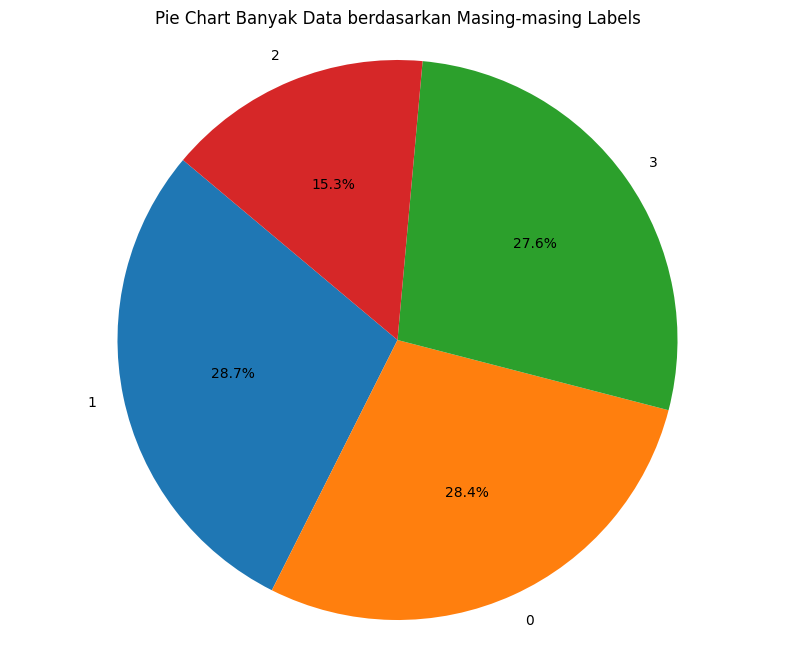

In [61]:
label_counts = df_final['label'].value_counts()
uniq_labels = label_counts.index.tolist()
print(label_counts)
print("\n")
print(uniq_labels)
print("\n")

# for label in df_final['label'].columns:
#   uniq_label = df_final['label'][label].unique()
#   print(uniq_label)
# Create pie chart
plt.figure(figsize=(10,8)) # Set the figure size
plt.pie(label_counts, labels=uniq_labels, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Pie Chart Banyak Data berdasarkan Masing-masing Labels')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

# Menampilkan Kembali Histogram dari Data Final setelah Feature Engineering, dan terlihat bahwa data telah terdistribusi dengan normal dibuktikan dengan histogram yang membentuk kurva lonceng

<ipython-input-43-f9b655fd0c9b>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='blue')


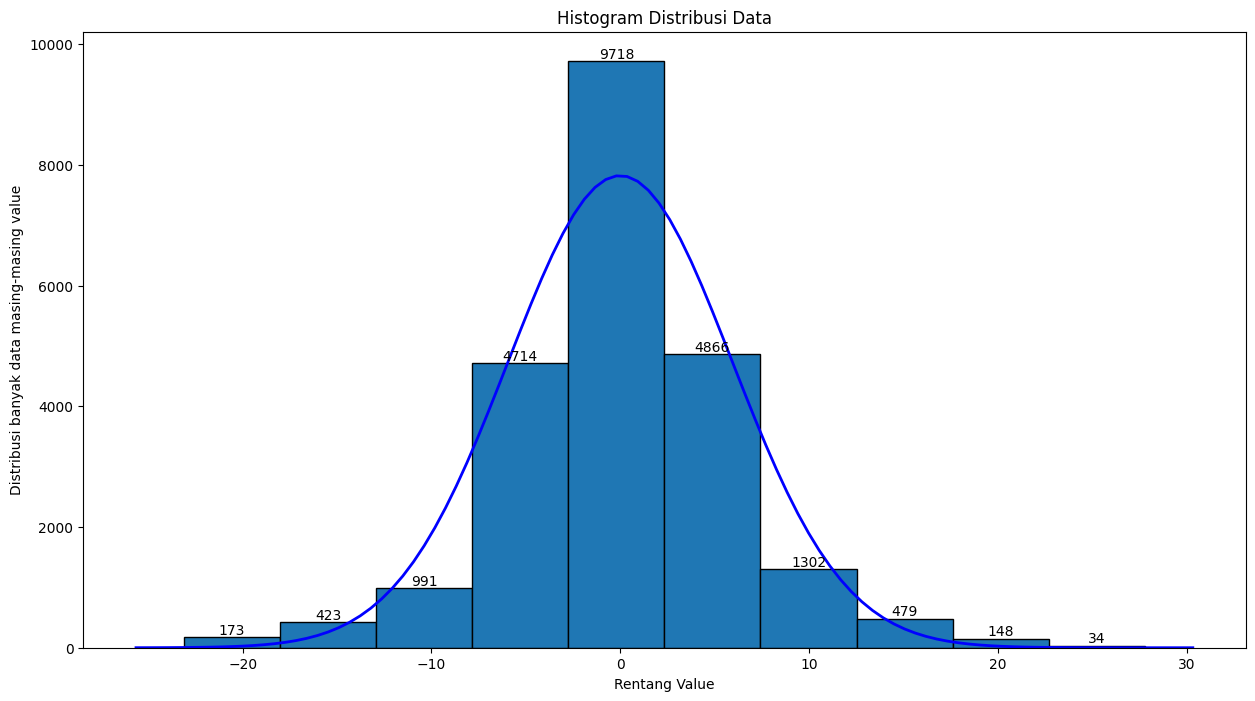

In [43]:
from scipy.stats import norm

plt.figure(figsize=(15,8))
counts, bins, _ = plt.hist(df_pca.values.flatten(),edgecolor='black') #values.flatten() untuk mengambil nilai dari seluruh dataframe ( menciptakan bar yang utuh dalam satu interval )

# Menambahkan kurva distribusi normal
mu, std = norm.fit(df_pca.values.flatten()) # Memperoleh parameter mean dan std dari data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) * np.sum(np.diff(bins) * counts) # Normalisasi kurva distribusi normal agar cocok dengan histogram
plt.plot(x, p, 'k', linewidth=2, color='blue')

for i in range (len(bins)-1):
  plt.text((bins[i] + bins[i+1])/2, counts[i], int(counts[i]), ha='center', va='bottom') #menentukan penempatan posisi value diatas bar

plt.title("Histogram Distribusi Data")
plt.ylabel("Distribusi banyak data masing-masing value")
plt.xlabel("Rentang Value")
plt.show()




#SUMMARY

- Dataset tersebut adalah dataset dengan jenis **Supervised Learning** dimana datanya merupakan beberapa fitur yang menghasilkan label tertentu yaitu antara 0,1,2 dan 3.
- Label pada dataset bersifat diskrit sehingga dapat disimpulkan bahwa data ini adalah bentuk klasifikasi.
- **Feature Engineering** yang digunakan adalah Principal Component Analytic ( PCA ) karena merupakan salahsatu feature Engineering yang sangat cocok untuk mentransform data menjadi skala yang lebih kecil serta mengurangi banyaknya fitur dari dataset. PCA akan mampu membawa data menuju akurasi yang baik untuk pemodelan.
- Untuk melakukan klasifikasi terhadap data ini, algoritma yang digunakan adalah **Algoritma Klasifikasi ( Random Forest classifier )** karena Cocok untuk data dengan fitur yang tidak terlalu besar dan mungkin memiliki hubungan non-linear antara fitur dan target. Random Forest juga ekerja dengan baik dengan data numerik serta cenderung memiliki kinerja yang baik bahkan tanpa penyetelan parameter yang rumit.
- Setelah melakukan pemodelan dan evaluasi, didapatlah akurasi yang baik untuk digunakan pada prediksi selanjutnya yaitu sebesar 0.76. Akurasi ini telah terbukti dengan testing pada dataset baru dan hasilnya sesuai yaitu menghasilkan label yang tepat sesuai seperti pada dataset awal yang telah di training.


# Saya yakin dan Percaya analisis, explorasi, dan pemodelan saya ini masih banyak banget yang kurang dan kemungkinan ada yang kurang sesuai. I Hope, saya dapat Feedback berupa saran, koreksi dan Masukkan untuk lebih baik lagi kedepannya. And The Last, Big thanks untuk GDSC Binus Bandung yang sudah menjadi wadah bagi kami untuk eksplorasi bidang ilmu ini, specially for Kak Put sebagai Speaker, Terimakasih banyak ilmunya kak, walau baru join di pertemuan kedua tetapi ilmunya dapat banget dan mudah dimengerti. MAKASIH BANYAK !